In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_train[54, 12, 13, 1]

0.36862746

In [27]:
# 케라스 모델 신경망 구성

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

In [7]:
# 신경망 레이어 제작

from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape = (32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [9]:
# 활성화 함수 정의
x = Dense(units = 200, activation = 'relu')(x)

In [11]:
# 최적화 함수, 손실 함수 정의

from keras.optimizers import Adam

opt = Adam(learning_rate = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [12]:
# 모델 훈련 시작
# 에포크 10회
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8429 - accuracy: 0.3356
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6698 - accuracy: 0.4040
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5907 - accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5386 - accuracy: 0.4528
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4965 - accuracy: 0.4665
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4661 - accuracy: 0.4772
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4440 - accuracy: 0.4851
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4166 - accuracy: 0.4947
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3980 - accuracy: 0.5025
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.377

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4727 - accuracy: 0.4829


[1.4726898670196533, 0.4828999936580658]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 3ms/step


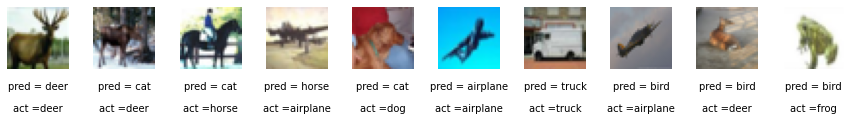

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act =' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform=ax.transAxes)
    ax.imshow(img)

In [28]:
# convolution 계층 추가
from keras.layers import Conv2D, BatchNormalization, LeakyReLU

input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4, 4),
    strides = 2,
    padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3, 3),
    strides = 2,
    padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units = 10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.layers import BatchNormalization, Dropout, Activation
# 드랍아웃, 배치정규화, 활성화함수를 적용한 모델 작성

input_layer = Input(shape=(32, 32, 3))

x = Conv2D(
    filters = 32,
    kernel_size = 3,
    strides = 1,
    padding = 'same'
    )(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(
    filters = 32,
    kernel_size = 3,
    strides = 2,
    padding = 'same'
    )(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = 1,
    padding = 'same'
    )(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = 2,
    padding = 'same'
    )(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [36]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                          

In [38]:
# 모델 훈련. 에포크 10회

model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.4797 - accuracy: 0.4751
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1068 - accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9749 - accuracy: 0.6579
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9013 - accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8479 - accuracy: 0.7039
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7983 - accuracy: 0.7207
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7580 - accuracy: 0.7351
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7217 - accuracy: 0.7470
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6960 - accuracy: 0.7556
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.

In [39]:
# 평가단계
model.evaluate(x_test, y_test, batch_size = 1000)

10/10 [==============================] - 0s 26ms/step - loss: 0.7988 - accuracy: 0.7260


[0.798760175704956, 0.7260000109672546]

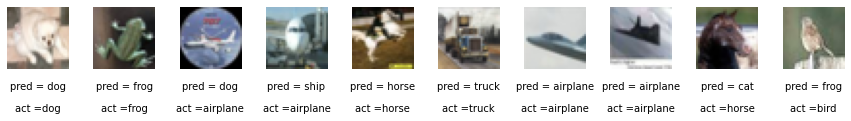

In [42]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act =' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform=ax.transAxes)
    ax.imshow(img)